<a href="https://colab.research.google.com/github/ItsMeAbby/Crypten/blob/main/Crypten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Secure Multi-Party Computation and CrypTen
#### Presention by:

 * Muhammad Abdullah Hayat, fd0002018
 * Muhammad Khurram Meraj, fd 0002044
 * Nayel Hashmi, fd0002021



***Code Link***

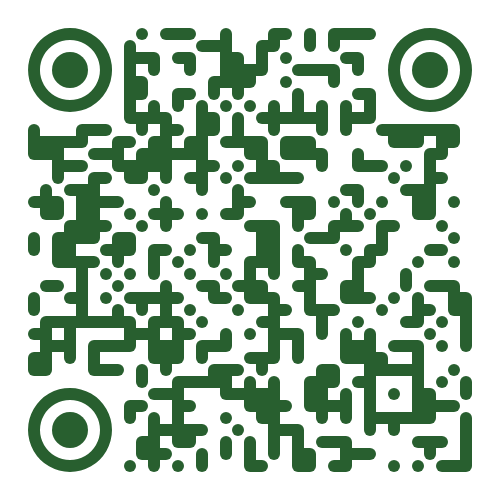

## Agenda

1. **Introduction**
2. **What is Secure Multi-Party Computation (MPC)?**
3. **Overview of CrypTen**
4. **MPC Techniques in CrypTen**
5. **Project Overview: Secure Logistic Regression**
6. **Data Preparation in MPC**
7. **Model Training with CrypTen**
8. **Secure Inference**
9. **Conclusion**
10. **References**

---

## Introduction

- The rise of data privacy concerns necessitates secure ways to perform computations on private data.
- **Secure Multi-Party Computation (MPC)** allows multiple parties to jointly compute a function over their inputs while keeping those inputs private.
- **CrypTen** is a framework built on PyTorch that enables easy implementation of MPC techniques for machine learning.

---

## What is Secure Multi-Party Computation (MPC)?

- **Definition**: MPC allows parties to compute a function over their inputs without revealing the inputs themselves.
- **Goal**: Ensure that no more information is revealed than what can be inferred from the output.
- **Applications**:
  - Privacy-preserving data analytics.
  - Secure training of machine learning models.
  - Collaborative computations among untrusted parties.

---

## Key Concepts in MPC

- **Secret Sharing**:
  - Data is split into shares distributed among parties.
  - No single party holds enough information to reconstruct the original data.
- **Computation on Shares**:
  - Parties perform operations on their shares.
  - Results are combined to obtain the final output without revealing individual inputs.

---

## Overview of CrypTen

- **CrypTen** is a research framework for secure, privacy-preserving machine learning.
- **Built on PyTorch**: Leverages PyTorch's APIs and functionalities.
- **Features**:
  - Easy-to-use API similar to PyTorch.
  - Support for common neural network modules.
  - Secure computation protocols implemented under the hood.

---

## Advantages of CrypTen

- **Machine Learning First**: Designed with ML practitioners in mind.
- **Eager Execution**: Immediate computation results, similar to PyTorch.
- **Interoperability**: Compatibility with existing PyTorch models and datasets.
- **Flexible and Extensible**: Supports custom models and functions.

---

## MPC Techniques in CrypTen

- **Arithmetic Secret Sharing**:
  - Data is represented as shares such that the sum of shares reconstructs the original value.
  - Used for operations like addition and multiplication.
- **Beaver Triples**:
  - Pre-shared random values that facilitate secure multiplication.
  - Allow parties to compute products without revealing operands.
- **Secure Non-Linear Computations**:
  - Approximations for functions like sigmoid, softmax, and logarithms.
  - Use iterative methods suitable for MPC.

---

## Arithmetic Secret Sharing in CrypTen

- **Additive Sharing**:
  - Each party holds a share \[x]i such that \( x = ∑i[x]i \).
- **Operations**:
  - **Addition**: Parties add their shares locally.
  - **Multiplication**: Uses Beaver triples to securely compute products.

---

## Beaver Triples Explained

- **Purpose**: Enable secure multiplication of secret-shared values.
- **Process**:
  1. Parties have \( [a] \), \( [b] \), \( [c] \) where \( c = a × b \).
  2. Compute \( [e] = [x] - [a] \) and \( [f] = [y] - [b] \).
  3. Reconstruct \( e \) and \( f \) securely.
  4. Compute \( [z] = [c] + e[b] + f[a] + ef \).

---

## CrypTen's Approach to Non-Linear Functions

- Uses secure approximations for functions that are not natively supported in MPC.

- **Examples**:
  - **Sigmoid**: Computed using the secure exponential function and division.
  - **Logarithm**: Approximated using iterative methods like Newton-Raphson.

---

## Project Overview: Secure Logistic Regression

- **Objective**: Train a logistic regression model over data held privately by multiple parties.
- **Dataset**: Image data (similar to Fashion-MNIST) distributed among 3 parties.
- **Tasks**:
  - Prepare and encrypt data from each party.
  - Combine data securely without revealing individual data.
  - Train the model using CrypTen's secure computation protocols.
  - Evaluate the model on a test set.

---

## Data Preparation in MPC

- **Data Distribution**:
  - Each party holds its own private dataset.
  - Data is not shared in plaintext with other parties.
- **Processing Steps**:
  1. Each party normalizes its data locally.
  2. Data is encrypted using secret sharing.
  3. Encrypted data is saved and ready for computation.

---

## Secure Data Loading with CrypTen

- **Encrypting Data**:
  - Use `crypten.save_from_party()` to save encrypted data.
  - Specify the source party to ensure data origins are known.
- **Combining Data**:
  - Parties collaboratively load encrypted data from others using `crypten.load_from_party()`.
  - Data is combined securely, maintaining privacy.

---

## Model Training with CrypTen

- **Model Definition**:
  - Logistic Regression model defined using `crypten.nn.Module`.
  - Consists of a single linear layer suitable for multi-class classification.
- **Training Process**:
  - Loss computed using `crypten.nn.CrossEntropyLoss()`.
  - Gradients computed securely; parameters updated with `model.update_parameters()`.
- **MPC in Training**:
  - All computations are performed on encrypted data and model parameters.
  - Uses arithmetic secret sharing and Beaver triples.

---

## Secure Inference

- **Testing the Model**:
  - Decrypted model can be used for standard inference.
  - For secure inference, encrypt both the model and the test data.
- **Process**:
  1. Encrypt the trained model.
  2. Encrypt the test data.
  3. Perform inference using CrypTen's secure computation.
  4. Decrypt the predictions for evaluation.

---

## Results and Evaluation

- **Accuracy**:
  - Model evaluated on the test set.
  - Comparable performance to non-MPC training.
- **Privacy Preservation**:
  - Data from each party remains private throughout the process.
  - No sensitive information is leaked during training or inference.

---

## Conclusion

- **CrypTen** enables secure machine learning using MPC techniques without requiring deep cryptographic expertise.
- **Practical Implementation**:
  - Similar API to PyTorch makes adoption easier.
  - Secure computations are abstracted away, allowing focus on model development.
- **Future Work**:
  - Extend to more complex models and datasets.
  - Explore performance optimizations and scalability.

---

## References

1. **CrypTen: Secure Multi-Party Computation Meets Machine Learning**
   - Knott et al., NeurIPS 2021.
   - [Paper Link](https://proceedings.neurips.cc/paper/2021/file/2754518221cfbc8d25c13a06a4cb8421-Paper.pdf)
2. **CrypTen GitHub Repository**
   - [https://github.com/facebookresearch/crypten](https://github.com/facebookresearch/crypten)
3. **Secure Multi-Party Computation (MPC)**
   - Yao, A. C. (1986). How to generate and exchange secrets.
4. **Beaver Multiplication Protocol**
   - Beaver, D. (1991). Efficient Multiparty Protocols Using Circuit Randomization.
   - [Link](https://link.springer.com/chapter/10.1007/0-387-34805-0_21)

---

# Secure Multi-Party Logistic Regression using CrypTen

In this notebook, we'll demonstrate how to perform logistic regression in a secure multi-party computation (MPC) setting using the **CrypTen** framework. We'll walk through the steps of preparing data held by multiple parties, training a logistic regression model without revealing the parties' private data, and evaluating the model's performance.

We'll also explain the underlying MPC techniques used by CrypTen to perform secure computations, referencing the paper:

> **CrypTen: Secure Multi-Party Computation Meets Machine Learning**  
> Knott et al., NeurIPS 2021  
> [Link to Paper](https://proceedings.neurips.cc/paper/2021/file/2754518221cfbc8d25c13a06a4cb8421-Paper.pdf)


## Setup

First, let's set up the environment and import the necessary libraries.

***Works only for CPU runtime***

### Installing and Importing Libraries

In [ ]:
import os
import os
os.environ["SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL"] = "True"


In [ ]:
%pip install -q crypten

We import the `crypten` library and initialize it using `crypten.init()`. This sets up the communication backends and prepares CrypTen for secure multi-party computations.

In [ ]:
import crypten
crypten.init()

In [ ]:
import sys
import torch
import torchvision
import matplotlib.pyplot as plt

from crypten import mpc


We set the number of threads for PyTorch to 1 to avoid issues with multi-threading in a multi-process environment, which is common in MPC setups.

In [ ]:
torch.set_num_threads(1)


## Data Preparation

### Downloading and Extracting the Dataset

We'll download a dataset to use in our example. The dataset contains images similar to Fashion-MNIST.

In [ ]:
# prompt: !download http://www.gepperth.net/alexander/downloads/data1.zip as wget

!wget http://www.gepperth.net/alexander/downloads/data1.zip
!unzip data1.zip

We download and unzip the dataset, which will create a `fashion_mnist` directory containing image files.

In [ ]:
parties=3

We set the number of parties participating in our MPC protocol to 3. Each party will have its own private dataset.

### Partitioning the Data Among Parties

We'll simulate the scenario where each party holds a portion of the dataset privately.


In [ ]:
# prompt: create len(parties) folder naming 0, 1, 2 and from fashion_mnist folder, put 1000 images from randomly starting from 0 to 5 filename,

import os
import random

import shutil

# Define the source and destination directories
source_dir = "fashion_mnist"  # Assuming fashion_mnist directory exists
files = os.listdir(source_dir)

# Create the destination directories if they don't exist
for i in range(parties):
    destination_dir = str(i)
    if os.path.exists(destination_dir):
        try:
            shutil.rmtree(destination_dir)
            print(f"Folder '{destination_dir}' deleted successfully.")
        except OSError as e:
            print(f"Error deleting folder '{destination_dir}': {e}")
    else:
        print(f"Folder '{destination_dir}' not found.")

    os.makedirs(destination_dir, exist_ok=True)

    # Randomly select 20 images from labels 0 to 4 for each party
    for x in range(5):
      random_files = random.sample([f for f in files if f.startswith(str(x))], 20)
      for file in random_files:
          source_path = os.path.join(source_dir, file)
          destination_path = os.path.join(destination_dir, file)
          shutil.copy(source_path, destination_path)

# Create Test Set
destination_dir="test"
if os.path.exists(destination_dir):
        try:
            shutil.rmtree(destination_dir)
            print(f"Folder '{destination_dir}' deleted successfully.")
        except OSError as e:
            print(f"Error deleting folder '{destination_dir}': {e}")
else:
        print(f"Folder '{destination_dir}' not found.")
os.makedirs(destination_dir, exist_ok=True)
for x in range(5):
      random_files = random.sample([f for f in files if f.startswith(str(x))], 5)
      for file in random_files:
          source_path = os.path.join(source_dir, file)
          destination_path = os.path.join(destination_dir, file)
          shutil.copy(source_path, destination_path)




Folder '0' deleted successfully.
Folder '1' deleted successfully.
Folder '2' deleted successfully.
Folder 'test' deleted successfully.


- For each party (0, 1, 2), we create a directory and copy 20 random images of each label from 0 to 4 into it.
- We also create a separate `test` directory for evaluating our model later.


### Converting Images to NumPy Arrays and Saving as `.npz` Files

We define a function to process the images and save them in a format suitable for training.

In [ ]:
import numpy as np
import os
import sys
import argparse
from PIL import Image

def make_npz(image_folder,h,w,c,output_file):


    X = []
    T = []

    # Load images and labels
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):
            # Extract label from filename (assumes format: label-index.png)
            label = int(filename.split('-')[0])
            img_path = os.path.join(image_folder, filename)
            img = Image.open(img_path)

            # Resize image to the specified dimensions
            img = img.resize((w, h))

            # Convert image to grayscale if channels = 1
            if c == 1:
                img = img.convert('L')

            # Convert image to NumPy array
            img_array = np.array(img)

            # Add channel dimension if needed
            if c == 1:
                img_array = img_array[:, :, np.newaxis]

            X.append(img_array)
            T.append(label)

    # Convert lists to NumPy arrays
    X = np.array(X)
    T = np.array(T)

    # Save the arrays to an .npz file
    np.savez(output_file, X=X, T=T)
    print(f'Data saved to {output_file}')


- This function reads images from a folder, processes them, and saves the dataset as `.npz` files.
- Parameters:
  - `h`, `w`: Height and width to resize images.
  - `c`: Number of channels (1 for grayscale).
  - `output_file`: Name of the output `.npz` file.

### Processing and Saving Data for Each Party and the Test Set

In [ ]:
for i in range(parties):
    make_npz(str(i),28,28,1,f"{i}.npz")
make_npz("test",28,28,1,"test.npz")

Data saved to 0.npz
Data saved to 1.npz
Data saved to 2.npz
Data saved to test.npz


- We create `.npz` files for each party and the test set with images resized to 28x28 pixels and converted to grayscale.

## Secure Data Loading and Sharing Using CrypTen

### Processing and Saving Each Party's Data Securely

We use CrypTen's MPC functionalities to securely process and save the data.

In [ ]:
@mpc.run_multiprocess(world_size=3)
def process_npz(npz_file, rank):
    images, labels = [], []
    data = np.load(npz_file)
    X = data['X']  # Shape: (num_samples, height, width, channels)
    T = data['T']  # Shape: (num_samples,)

    # Normalize the data to [0, 1]
    X = X / 255.0
    X_tensor = torch.from_numpy(X).float()
    T_tensor = torch.from_numpy(T).long()
    # enc_X_tensor = crypten.cryptensor(X_tensor)
    # enc_T_tensor = crypten.cryptensor(T_tensor)
    crypten.save_from_party(X_tensor, f"{rank}_images.pth", src=rank)
    crypten.save_from_party(T_tensor, f"{rank}_labels.pth", src=rank)




- `@mpc.run_multiprocess(world_size=3)`: This decorator runs the function in separate processes for each party.
- Each party loads its own `.npz` file and normalizes the data.
- `crypten.save_from_party` securely saves the data from each party, specifying the source party with `src=rank`.


### Running the Data Processing Function for Each Party

In [ ]:
# for each party process npz
for idx,npz_file in enumerate([f"{i}.npz" for i in range(parties)]):
    process_npz(npz_file, rank=idx)



- We call the `process_npz` function for each party, passing the corresponding `.npz` file and rank.

In [ ]:
@mpc.run_multiprocess(world_size=3)
def combine_data():
  # combine data
  X_list = []
  T_list = []
  for rank in range(parties):
    X_list.append(crypten.load_from_party(f"{rank}_images.pth", src=rank))
    T_list.append(crypten.load_from_party(f"{rank}_labels.pth", src=rank))
  X = torch.cat(X_list, dim=0)
  T = torch.cat(T_list, dim=0)
  return X,T

- We load and combine data from all parties securely.
- `crypten.load_from_party` loads data saved by each party.

### Securely Storing and Combining Data for Training

In [ ]:
@mpc.run_multiprocess(world_size=3)
def store_npz():
    npz_files = [f"{i}.npz" for i in range(parties)]
    rank = crypten.communicator.get().get_rank()

    # List all npz files in the directory


    # Each party processes its own npz file based on rank
    npz_file = npz_files[rank]
    data = np.load(npz_file)
    X = data['X']  # Shape: (num_samples, height, width, channels)
    T = data['T']  # Shape: (num_samples,)


    # Normalize the data to [0, 1]
    X = X / 255.0
    X_tensor = torch.from_numpy(X).float()
    T_tensor = torch.from_numpy(T).long()
    crypten.print(f"Rank {rank} has loaded data.",X_tensor.shape,T_tensor.shape,in_order=True)

    # Save the tensors from each party
    for i in range(len(npz_files)):
        crypten.save_from_party(X_tensor, f"{i}_images.pth", src=i)
        crypten.save_from_party(T_tensor, f"{i}_labels.pth", src=i)

store_npz()

Rank 0 has loaded data. torch.Size([100, 28, 28, 1]) torch.Size([100])
Rank 1 has loaded data. torch.Size([100, 28, 28, 1]) torch.Size([100])
Rank 2 has loaded data. torch.Size([100, 28, 28, 1]) torch.Size([100])


[None, None, None]

### Combining Data from All Parties

- We combine the data from all parties and perform one-hot encoding of labels.
- The combined data and encrypted labels are saved for training.

In [ ]:
@mpc.run_multiprocess(world_size=5,maxsize=5)
def combine_data():
    npz_files = [f"{i}.npz" for i in range(parties)]
    # print(f"World size: {world_size}")
    # Combine data from all parties
    X_list = []
    T_list = []
    for i in range(len(npz_files)):
        # Each party loads data from all parties
        X_i = crypten.load_from_party(f"{i}_images.pth", src=i)
        T_i = crypten.load_from_party(f"{i}_labels.pth", src=i)
        # crypten.print(f"Rank {i} has loaded data. {X_i.shape}, {T_i.shape}, {T_i.get_plain_text()} ")
        X_list.append(X_i)
        T_list.append(T_i)


    # Concatenate the data
    X_combined = torch.cat(X_list, dim=0)
    T_combined = torch.cat(T_list, dim=0)
    dec=T_combined.get_plain_text()
    input_dim = X_combined.shape[1:]
    max_label=int(max(dec))
    output_dim = max_label+1
    # do one hot encoding
    labels=[]
    for label in dec:
        # long_dtype convert label to long
        x=torch.nn.functional.one_hot(torch.tensor(label,dtype=torch.long),output_dim)
        labels.append(x)
    labels = torch.stack(labels)
    enc_labels=crypten.cryptensor(labels)

    crypten.save(X_combined, "X_combined.pth")
    crypten.save(enc_labels, "T_combined.pth")

combine_data()

/usr/local/lib/python3.11/dist-packages/crypten/__init__.py:334: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = load_closure(f, **kwargs)
/usr/local/lib/python3.11/d

[None, None, None, None, None]

## Defining the Logistic Regression Model

We define a logistic regression model suitable for multi-class classification.

- The model inherits from `crypten.nn.Module`, allowing it to be used within CrypTen's MPC framework.
- It consists of a single linear layer that maps the flattened input to the output classes.

In [ ]:
import os
import numpy as np
import crypten
import torch

from crypten import mpc

    # crypten.init()
# Remove the initial `crypten.init()`
crypten.init()  # No need to call this here

class LogisticRegression(crypten.nn.Module):
    def __init__(self, input_dim, output_dim):
      super().__init__()
      height, width,channels = input_dim
      self.linear = crypten.nn.Linear(channels * height * width, output_dim)

    def forward(self, x):
      batch_size = x.size(0)
      x = x.reshape(batch_size, -1)
      return self.linear(x)

/usr/local/lib/python3.11/dist-packages/crypten/__init__.py:64: RuntimeWarning: CrypTen is already initialized.
  warnings.warn("CrypTen is already initialized.", RuntimeWarning)


### CrypTen's Approach to MPC in Neural Networks

- **Secret Sharing of Parameters**: Model parameters are secret-shared among the parties. Each party holds a share of the parameters, and computations are performed on these shares.
- **Secure Computations**: Linear operations are computed using arithmetic secret sharing, where each party performs computations on their shares, and the results remain secret-shared.

## Training the Model Securely



### Defining the Training Function

In [ ]:


def train_data(model, X, y, epochs=5, learning_rate=0.05, batch_size=128):
    criterion = crypten.nn.CrossEntropyLoss()
    num_samples = X.size(0)

    for epoch in range(epochs):
        model.zero_grad()
        epoch_loss = 0

        # Shuffle the data
        indices = torch.randperm(num_samples)
        X = X[indices]
        y = y[indices]

        # Iterate over batches
        for start_idx in range(0, num_samples, batch_size):
            end_idx = min(start_idx + batch_size, num_samples)
            X_batch = X[start_idx:end_idx]
            y_batch = y[start_idx:end_idx]

            output = model(X_batch)
            loss = criterion(output, y_batch)
            epoch_loss += int(loss.get_plain_text())

            loss.backward()
            model.update_parameters(learning_rate)
            batch_number=int(start_idx/batch_size)
            crypten.print(f"epoch: {epoch} batch: {batch_number} loss:{loss.get_plain_text()}")

        # crypten.print(f"epoch {epoch} loss: {epoch_loss / (num_samples // batch_size)}")

    return model


- The training function resembles standard PyTorch training loops but uses CrypTen functionalities.
- **Cross-Entropy Loss**: We use `crypten.nn.CrossEntropyLoss()`, which computes the loss securely using MPC techniques.
- **Backward Pass**: Gradients are computed securely, and parameters are updated using `model.update_parameters()`.

In [ ]:


@mpc.run_multiprocess(world_size=5)
def train_test():
    npz_files = [f"{i}.npz" for i in range(parties)]
    # Combine data from all parties
    X_list = []
    T_list = []
    for i in range(len(npz_files)):
        # Each party loads data from all parties
        X_i = crypten.load_from_party(f"{i}_images.pth", src=i)
        T_i = crypten.load_from_party(f"{i}_labels.pth", src=i)
        # print(f"Rank {i} has loaded data. {X_i.shape}, {T_i.shape}, {T_i.get_plain_text()} ")
        X_list.append(X_i)
        T_list.append(T_i)


    # Concatenate the data
    X_combined = torch.cat(X_list, dim=0)
    T_combined = torch.cat(T_list, dim=0)
    dec=T_combined.get_plain_text()
    input_dim = X_combined.shape[1:]
    max_label=int(max(dec))
    output_dim = max_label+1
    # do one hot encoding
    labels=[]
    for label in dec:
        # long_dtype convert label to long
        x=torch.nn.functional.one_hot(torch.tensor(label,dtype=torch.long),output_dim)
        labels.append(x)
    labels = torch.stack(labels)

    # print(f"Input dimension: {input_dim}, Output dimension: {output_dim} {T_combined.get_plain_text()}")
    model=LogisticRegression(input_dim,output_dim)
    model_enc=model.encrypt(src=4)
    enc_labels=crypten.cryptensor(labels)
    model=train_data(model_enc,X_combined,enc_labels)
    # save model
    torch.save(model.decrypt(),"model.pth")


train_test()

/usr/local/lib/python3.11/dist-packages/crypten/__init__.py:334: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = load_closure(f, **kwargs)
/usr/local/lib/python3.11/d

epoch: 0 batch: 0 loss:1.657684326171875
epoch: 0 batch: 1 loss:1.5697479248046875
epoch: 0 batch: 2 loss:1.481292724609375
epoch: 1 batch: 0 loss:1.3783721923828125
epoch: 1 batch: 1 loss:1.3565826416015625
epoch: 1 batch: 2 loss:1.28399658203125
epoch: 2 batch: 0 loss:1.2330780029296875
epoch: 2 batch: 1 loss:1.1878509521484375
epoch: 2 batch: 2 loss:1.115020751953125
epoch: 3 batch: 0 loss:1.1845245361328125
epoch: 3 batch: 1 loss:1.078125
epoch: 3 batch: 2 loss:1.0481719970703125
epoch: 4 batch: 0 loss:1.092193603515625
epoch: 4 batch: 1 loss:1.0303192138671875
epoch: 4 batch: 2 loss:0.935302734375


[None, None, None, None, None]

### How CrypTen Performs MPC During Training

- **Arithmetic Secret Sharing**: The model parameters and data are secret-shared using arithmetic secret sharing, enabling secure linear operations.
- **Beaver Triples**: For secure multiplication during backpropagation, CrypTen uses Beaver triples to compute products without revealing the operands.
- **Communication**: Parties communicate as needed for secure computations, but the actual data remains private.

## Evaluating the Model



We evaluate the trained model on the test set.

### Loading and Testing the Model

In [ ]:
# load decryted model

model=crypten.load("model.pth")
# torch.mode.eval()
data=np.load("test.npz")
crypten.init()
correct=[]
for i in range(len(os.listdir("test"))):
  image_0=data["X"][i]
  label_i=data["T"][i]
  image_t=torch.from_numpy(image_0).float()
  prediction = model(image_t.unsqueeze(0))
  crypten.print(f"original label: {int(label_i)}, predicted label: {int(prediction[0].argmax())}")
  if int(prediction[0].argmax())==int(label_i):
    correct.append(1)
  else:
    correct.append(0)
crypten.print(f"accuracy: {sum(correct)/len(correct)}")

original label: 4, predicted label: 4
original label: 2, predicted label: 4
original label: 3, predicted label: 3
original label: 0, predicted label: 4
original label: 2, predicted label: 4
original label: 2, predicted label: 4
original label: 4, predicted label: 4
original label: 3, predicted label: 3
original label: 0, predicted label: 0
original label: 1, predicted label: 1
original label: 0, predicted label: 0
original label: 0, predicted label: 4
original label: 1, predicted label: 1
original label: 4, predicted label: 3
original label: 3, predicted label: 3
original label: 2, predicted label: 4
original label: 3, predicted label: 3
original label: 4, predicted label: 4
original label: 3, predicted label: 3
original label: 1, predicted label: 1
original label: 1, predicted label: 1
original label: 0, predicted label: 3
original label: 1, predicted label: 1
original label: 2, predicted label: 4
original label: 4, predicted label: 4
accuracy: 0.64


/usr/local/lib/python3.11/dist-packages/crypten/__init__.py:386: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  obj = load_closure(f)


- We load the decrypted model and the test data.
- We iterate through the test samples, performing inference and comparing predictions with true labels.
- **Note**: Since the model is decrypted, inference is standard.

### Secure Inference with Encrypted Model and Data

In [ ]:
# load decryted model

model=torch.load("model.pth")

# torch.mode.eval()
data=np.load("test.npz")
crypten.init()
model.encrypt()
correct=[]
for i in range(len(os.listdir("test"))):
    image_0=data["X"][i]
    label_i=data["T"][i]
    image_t=torch.from_numpy(image_0).float()
    enc_image=crypten.cryptensor(image_t.unsqueeze(0))
    prediction = model(enc_image)
    crypten.print(f"original label: {int(label_i)}, predicted label: {int(prediction.get_plain_text()[0].argmax())}")
    if int(prediction.get_plain_text()[0].argmax())==int(label_i):
      correct.append(1)
    else:
      correct.append(0)
crypten.print(f"accuracy: {sum(correct)/len(correct)}")

<ipython-input-107-08bca3ada4a7>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load("model.pth")


original label: 4, predicted label: 4
original label: 2, predicted label: 4
original label: 3, predicted label: 3
original label: 0, predicted label: 4
original label: 2, predicted label: 4
original label: 2, predicted label: 4
original label: 4, predicted label: 4
original label: 3, predicted label: 3
original label: 0, predicted label: 0
original label: 1, predicted label: 1
original label: 0, predicted label: 0
original label: 0, predicted label: 4
original label: 1, predicted label: 1
original label: 4, predicted label: 3
original label: 3, predicted label: 3
original label: 2, predicted label: 4
original label: 3, predicted label: 3
original label: 4, predicted label: 4
original label: 3, predicted label: 3
original label: 1, predicted label: 1
original label: 1, predicted label: 1
original label: 0, predicted label: 3
original label: 1, predicted label: 1
original label: 2, predicted label: 4
original label: 4, predicted label: 4
accuracy: 0.64


- We encrypt the model and perform inference using encrypted data.
- The predictions are obtained securely, and only the necessary outputs are decrypted for evaluation.
- This demonstrates CrypTen's capability to perform secure inference without revealing the input data or the model parameters.

## Underlying MPC Techniques in CrypTen


CrypTen uses several MPC techniques to ensure computations are performed securely:

### Arithmetic Secret Sharing

- **Concept**: Each party holds a share of the data such that the sum of all shares reconstructs the original data.
- **Operations**:
  - **Addition**: Parties add their shares locally.
  - **Multiplication**: Uses Beaver triples to perform multiplication without revealing the operands.


In [ ]:
# Number of parties
num_parties = 3

# Secret value to be shared
secret_value = 42

# Prime modulus for the finite field (to prevent overflow)
prime_modulus = 67  # Choose a prime larger than the secret_value

# Generate random shares for the first (n-1) parties
import random

shares = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]

# Compute the final share such that the sum modulo prime_modulus equals the secret_value
final_share = (secret_value - sum(shares)) % prime_modulus
shares.append(final_share)

# Distribute shares to parties
for idx, share in enumerate(shares):
    print(f"Party {idx + 1} receives share: {share}")

Party 1 receives share: 22
Party 2 receives share: 40
Party 3 receives share: 47


**Explanation**:

- We define a `secret_value` that we want to share among `num_parties`.
- We choose a `prime_modulus` for the finite field to avoid overflow and ensure proper modular arithmetic.
- We generate random shares for the first `n-1` parties.
- The final share is computed to ensure the sum of all shares modulo `prime_modulus` equals the `secret_value`.
- Each party receives one share.

### Reconstruction of the Secret

In [ ]:
# Reconstruction (each party provides their share)
reconstructed_value = sum(shares) % prime_modulus
print(f"The reconstructed secret is: {reconstructed_value}")

**Explanation**:

- By summing all the shares and taking modulo `prime_modulus`, we retrieve the original `secret_value`.
- This demonstrates that no single party knows the secret, but together they can reconstruct it.


### Addition of Secret-Shared Values

Arithmetic secret sharing supports operations directly on the shares without needing to reconstruct the secret. For addition:

Suppose we have two secret values, `a` and `b`.

In [ ]:

# Secret values
a = 30
b = 20
print(f"Secret a: {a}") # Added print statement
print(f"Secret b: {b}") # Added print statement

# Prime modulus for the finite field (to prevent overflow)
prime_modulus = 67  # Choose a prime larger than the secret_value
print(f"Prime modulus: {prime_modulus}") # Added print statement

# Number of parties
num_parties = 3
print(f"Number of parties: {num_parties}") # Added print statement


# Generate random shares for the first (n-1) parties
shares_a = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]

shares_a.append((a - sum(shares_a)) % prime_modulus)
print(f"Shares of a (all parties): {shares_a}") # Added print statement

shares_b = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_b.append((b - sum(shares_b)) % prime_modulus)
print(f"Shares of b (all parties): {shares_b}") # Added print statement

# Add shares locally
shares_sum = [(s_a + s_b) % prime_modulus for s_a, s_b in zip(shares_a, shares_b)]
print(f"Shares of sum (a+b): {shares_sum}") # Added print statement

# Reconstruct the sum
reconstructed_sum = sum(shares_sum) % prime_modulus
print(f"The sum of secrets a and b is: {reconstructed_sum}")


Secret a: 30
Secret b: 20
Prime modulus: 67
Number of parties: 3
Shares of a (all parties): [62, 46, 56]
Shares of b (all parties): [60, 48, 46]
Shares of sum (a+b): [55, 27, 35]
The sum of secrets a and b is: 50


**Explanation**:

- Each party adds their shares of `a` and `b` locally.
- The sum of the shares reconstructs the sum of the secrets.



### Beaver Triples

- **Purpose**: To enable secure multiplication of secret-shared values.
- **Process**:
  1. Parties obtain a pre-shared triple \(a, b, c\) where \( c = a × b \)\.
  2. They compute \( e = x - a \) and \( f = y - b \) securely.
  3. The product \( x × y \) is reconstructed using \( c + e × b + a × f + e × f \).



### Generating Beaver Triples

A Beaver triple consists of three values `(a, b, c)` such that `c = a * b`, and `a` and `b` are random values.

In [ ]:
# Generate random values for a and b
a = random.randint(0, prime_modulus - 1)
b = random.randint(0, prime_modulus - 1)
c = (a * b) % prime_modulus

# Secret-share a, b, c among the parties
shares_a = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_a.append((a - sum(shares_a)) % prime_modulus)

print(f"Shares of a (all parties): {shares_a}") # Added print statement

shares_b = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_b.append((b - sum(shares_b)) % prime_modulus)

print(f"Shares of b (all parties): {shares_b}") # Added print statement

shares_c = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_c.append((c - sum(shares_c)) % prime_modulus)

print(f"Shares of c (all parties): {shares_c}") # Added print statement


Shares of a (all parties): [31, 52, 34]
Shares of b (all parties): [40, 18, 26]
Shares of c (all parties): [15, 20, 11]


### Secure Multiplication Using Beaver Triples

Suppose parties have secret-shared values `[x]` and `[y]` that they wish to multiply.

In [ ]:
# Secret values to multiply
x = 15
y = 7

# Secret-share x and y
shares_x = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_x.append((x - sum(shares_x)) % prime_modulus)

print(f"Shares of x (all parties): {shares_x}")

shares_y = [random.randint(0, prime_modulus - 1) for _ in range(num_parties - 1)]
shares_y.append((y - sum(shares_y)) % prime_modulus)

print(f"Shares of y (all parties): {shares_y}")

Shares of x (all parties): [35, 1, 46]
Shares of y (all parties): [46, 65, 30]


**Beaver Multiplication Protocol Steps**:

1. **Compute local shares of e and f**:

    Each party computes:

In [ ]:
shares_e = [(s_x - s_a) % prime_modulus for s_x, s_a in zip(shares_x, shares_a)]
shares_f = [(s_y - s_b) % prime_modulus for s_y, s_b in zip(shares_y, shares_b)]

print(f"Shares of e (all parties): {shares_e}")
print(f"Shares of f (all parties): {shares_f}")


Shares of e (all parties): [4, 16, 12]
Shares of f (all parties): [6, 47, 4]


2. **Reveal e and f**:

In [ ]:
# Parties collaboratively reconstruct `e` and `f`:

e = sum(shares_e) % prime_modulus
f = sum(shares_f) % prime_modulus

print(f"Reconstructed e: {e}")
print(f"Reconstructed f: {f}")

Reconstructed e: 32
Reconstructed f: 57


In [ ]:
shares_prod = [
        (s_c + e * s_b + f * s_a + (e * f if i == 0 else 0)) % prime_modulus
        for i, (s_c, s_a, s_b) in enumerate(zip(shares_c, shares_a, shares_b))
    ]
shares_prod

[62, 9, 34]

- Only one party adds the term `e * f` to avoid duplication.

4. **Reconstruct the product**:

In [ ]:
(x * y) % prime_modulus

38

In [ ]:
product = sum(shares_prod)
print(f"The product of x and y is: {product}")

The product of x and y is: 105


**Explanation**:

- **Step 1**: Each party computes the difference between their shares and the Beaver triple shares.
- **Step 2**: `e` and `f` are revealed, but since `a` and `b` are random, this doesn't leak information about `x` and `y`.
- **Step 3**: Parties compute their shares of the product using the formula.
- **Step 4**: Summing the shares reconstructs the product `x * y`.


3. **Compute local shares of the product**:

### Secure Non-Linear Functions

- **Approximations**: Functions like sigmoid, softmax, and logarithms are approximated using polynomial or iterative methods suitable for secure computation.
- **CrypTen Implementations**:
  - Uses fixed-point arithmetic for real numbers.
  - Employs methods like Newton-Raphson iterations for functions like reciprocal and square root.



### Communication and Synchronization

- **CrypTen Backend**: Manages communication between parties, ensuring messages are exchanged securely.
- **Synchronization**: Functions decorated with `@mpc.run_multiprocess` run synchronously across parties.



### Data Privacy

- **Encrypted Inputs**: Data from each party is encrypted (secret-shared) before any computation.
- **Encrypted Outputs**: Intermediate computations remain encrypted; only the final results are decrypted if necessary.



## Conclusion

In this notebook, we demonstrated how to perform logistic regression in a secure multi-party computation setting using CrypTen. We walked through data preparation, model definition, training, and evaluation, all while preserving the privacy of each party's data.

CrypTen leverages MPC techniques, such as arithmetic secret sharing and Beaver triples, to enable secure computations. By providing an API similar to PyTorch, CrypTen makes it accessible for machine learning practitioners to implement privacy-preserving models without deep knowledge of cryptography.




## References

- **CrypTen: Secure Multi-Party Computation Meets Machine Learning**, Knott et al., NeurIPS 2021.
  - [Paper Link](https://proceedings.neurips.cc/paper/2021/file/2754518221cfbc8d25c13a06a4cb8421-Paper.pdf)
- **CrypTen GitHub Repository**: [https://github.com/facebookresearch/crypten](https://github.com/facebookresearch/crypten)

In [ ]:
# remove all pth files from folder
import os
for file in os.listdir():
    if file.endswith(".pth"):
        os.remove(file)